In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Intervalo de confiança

1. **Seleção da Amostra Aleatória**:
   - `amostra = np.random.choice(populacao, tamanho_amostra)`
   - Uma amostra aleatória é essencial para garantir que cada membro da população tenha igual chance de ser selecionado. Isso ajuda a evitar viés na amostra e assegura que a amostra seja representativa da população inteira.

2. **Cálculo da Média Amostral**:
   - `media_amostral = np.mean(amostra)`
   - A média amostral ($\bar{x}$) é o estimador da média populacional ($\mu$). Ela é calculada como a soma de todos os valores na amostra dividida pelo número de observações na amostra.

3. **Cálculo do Erro Padrão da Média**:
   - `erro_padrao = sigma / np.sqrt(tamanho_amostra)`
   - O erro padrão da média (SE) mede a variabilidade ou dispersão das médias amostrais em torno da média populacional. Ele é calculado dividindo o desvio padrão da população ($\sigma$) pela raiz quadrada do tamanho da amostra ($n$), refletindo quanto as médias amostrais se distribuem em torno da verdadeira média populacional.

4. **Determinação do Valor Crítico (Z-Score)**:
   - `z = norm.ppf((1 + confianca) / 2)`
   - O valor crítico $z$ para um determinado nível de confiança é encontrado usando a função percent point function (ppf), que retorna o valor de z que corresponde ao quantil desejado da distribuição normal padrão. Para um IC de 95%, $z$ é aproximadamente 1.96.

5. **Cálculo da Margem de Erro**:
   - `margem_erro = z * erro_padrao`
   - A margem de erro determina quão longe a média amostral pode estar da média populacional. É o produto do valor crítico $z$ e o erro padrão da média.

6. **Cálculo do Intervalo de Confiança**:
   - `intervalo = (media_amostral - margem_erro, media_amostral + margem_erro)`
   - O intervalo de confiança é uma estimativa do intervalo dentro do qual a média populacional verdadeira provavelmente se encontra, com um determinado nível de confiança.

In [2]:
# Configuração da população
mu = 50  # Média da população, centro da distribuição normal.
sigma = 10  # Desvio padrão da população, mede a dispersão da distribuição.

# Geração de uma população normal
populacao = np.random.normal(mu, sigma, 100000)

def calcular_intervalo_confianca(populacao, tamanho_amostra, confianca=0.95):
    # Selecionar amostra aleatória da população
    amostra = np.random.choice(populacao, tamanho_amostra)
    # Calcular a média da amostra
    media_amostral = np.mean(amostra)
    # Calcular o erro padrão da média (SE = sigma/sqrt(n))
    erro_padrao = sigma / np.sqrt(tamanho_amostra)
    # Determinar o z-score para o nível de confiança desejado
    # O valor crítico z para a confiança desejada; z-score para um IC de 95% é tipicamente 1.96 (para dois lados)
    z = norm.ppf((1 + confianca) / 2)
    # Calcular a margem de erro
    margem_erro = z * erro_padrao
    # Calcular o intervalo de confiança
    intervalo = (media_amostral - margem_erro, media_amostral + margem_erro)
    return media_amostral, intervalo, erro_padrao, amostra, margem_erro

Tamanho da amostra: 1, Erro Padrão: 10.0000, Intervalo de Confiança: (30.999663228483023, 70.1989429192841), Média Amostral: 50.59930307388356
Tamanho da amostra: 2, Erro Padrão: 7.0711, Intervalo de Confiança: (30.256410435087695, 57.97448692208125), Média Amostral: 44.11544867858447
Tamanho da amostra: 5, Erro Padrão: 4.4721, Intervalo de Confiança: (40.42214876844097, 57.952599579972606), Média Amostral: 49.18737417420679
Tamanho da amostra: 10, Erro Padrão: 3.1623, Intervalo de Confiança: (41.969317137330485, 54.36521778342172), Média Amostral: 48.1672674603761
Tamanho da amostra: 30, Erro Padrão: 1.8257, Intervalo de Confiança: (48.80159884206661, 55.95837541693524), Média Amostral: 52.379987129500925
Tamanho da amostra: 50, Erro Padrão: 1.4142, Intervalo de Confiança: (47.462962829548545, 53.00657812694726), Média Amostral: 50.2347704782479
Tamanho da amostra: 100, Erro Padrão: 1.0000, Intervalo de Confiança: (47.860348736762134, 51.78027670584224), Média Amostral: 49.82031272130

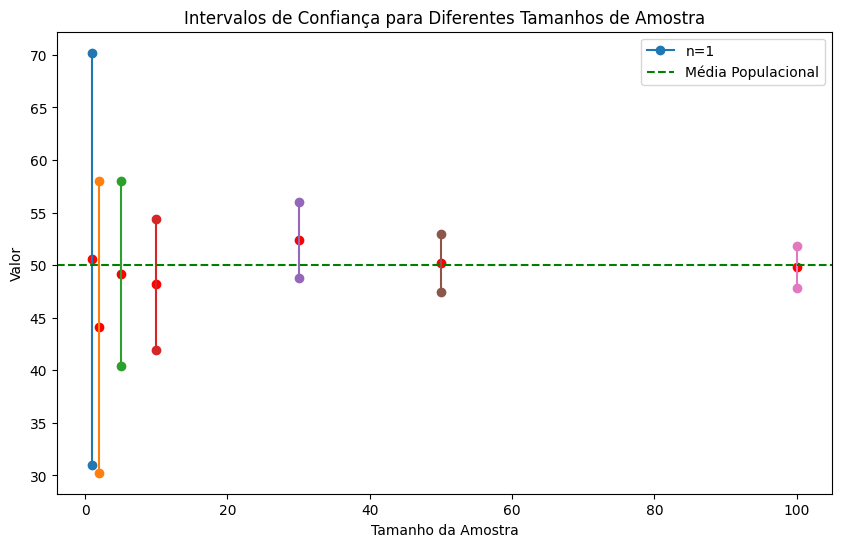

In [3]:
# Tamanhos de amostra para testar
tamanhos = [1, 2, 5, 10, 30, 50, 100]
medias = []
intervalos = []
amostras = []
margens_erros = []

# Calcular intervalos de confiança para cada tamanho de amostra
for tamanho in tamanhos:
    media, intervalo, erro_padrao, amostra, margem_erro = calcular_intervalo_confianca(populacao,tamanho, 0.95)
    medias.append(media)
    intervalos.append(intervalo)
    amostras.append(amostra)
    margens_erros.append(margem_erro)
    print(f"Tamanho da amostra: {tamanho}, Erro Padrão: {erro_padrao:.4f}, Intervalo de Confiança: {intervalo}, Média Amostral: {media}")

# Preparar o gráfico
plt.figure(figsize=(10, 6))
for i, tamanho in enumerate(tamanhos):
    # Plotar intervalos de confiança
    plt.plot([tamanho, tamanho], [intervalos[i][0], intervalos[i][1]], marker='o', label=f'n={tamanho}' if i == 0 else "")
    plt.scatter(tamanho, medias[i], color='red')  # Marcar a média amostral
# Adicionar detalhes ao gráfico
plt.axhline(y=mu, color='green', linestyle='--', label='Média Populacional')
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Valor')
plt.title('Intervalos de Confiança para Diferentes Tamanhos de Amostra')
plt.legend()
plt.show()


Observando que para $ n = 1 $, o intervalo de confiança fica bastante amplo e pode não incluir a média populacional (marcada pela linha verde tracejada), podemos tirar várias conclusões importantes sobre a natureza de intervalos de confiança e amostragem:

**Variabilidade Alta com Amostras Pequenas**: Com uma amostra de tamanho 1, a estimativa da média é baseada em apenas uma observação. Isso resulta em uma variabilidade muito alta, pois a única observação pode ser atípica (muito alta ou muito baixa em relação à média populacional). Como resultado, o intervalo de confiança é largo, tentando capturar a incerteza associada a uma estimativa tão volátil.

**Erro Padrão Grande**: Para $ n = 1 $, o erro padrão é igual ao desvio padrão da população, que é o maior possível neste contexto. Isso resulta em uma margem de erro grande, estendendo o intervalo de confiança para um alcance amplo que ainda pode não capturar a média populacional se a única observação for um outlier.

**Significado do Intervalo de Confiança**: O fato de o intervalo de confiança não cobrir a média populacional não invalida a metodologia; em vez disso, reflete a realidade de que com um nível de confiança de 95%, esperamos que aproximadamente 5% dos intervalos de confiança calculados não contenham a média populacional. Quando o tamanho da amostra é 1, a probabilidade de selecionar um outlier é relativamente alta, e isso pode levar a intervalos de confiança que não refletem a média da população.

**Importância do Tamanho da Amostra**: À medida que o tamanho da amostra aumenta, o erro padrão diminui, o que reduz a margem de erro e, consequentemente, estreita o intervalo de confiança. Isso aumenta a probabilidade de que o intervalo de confiança inclua a média populacional, como demonstrado nos resultados para tamanhos de amostra maiores no gráfico.

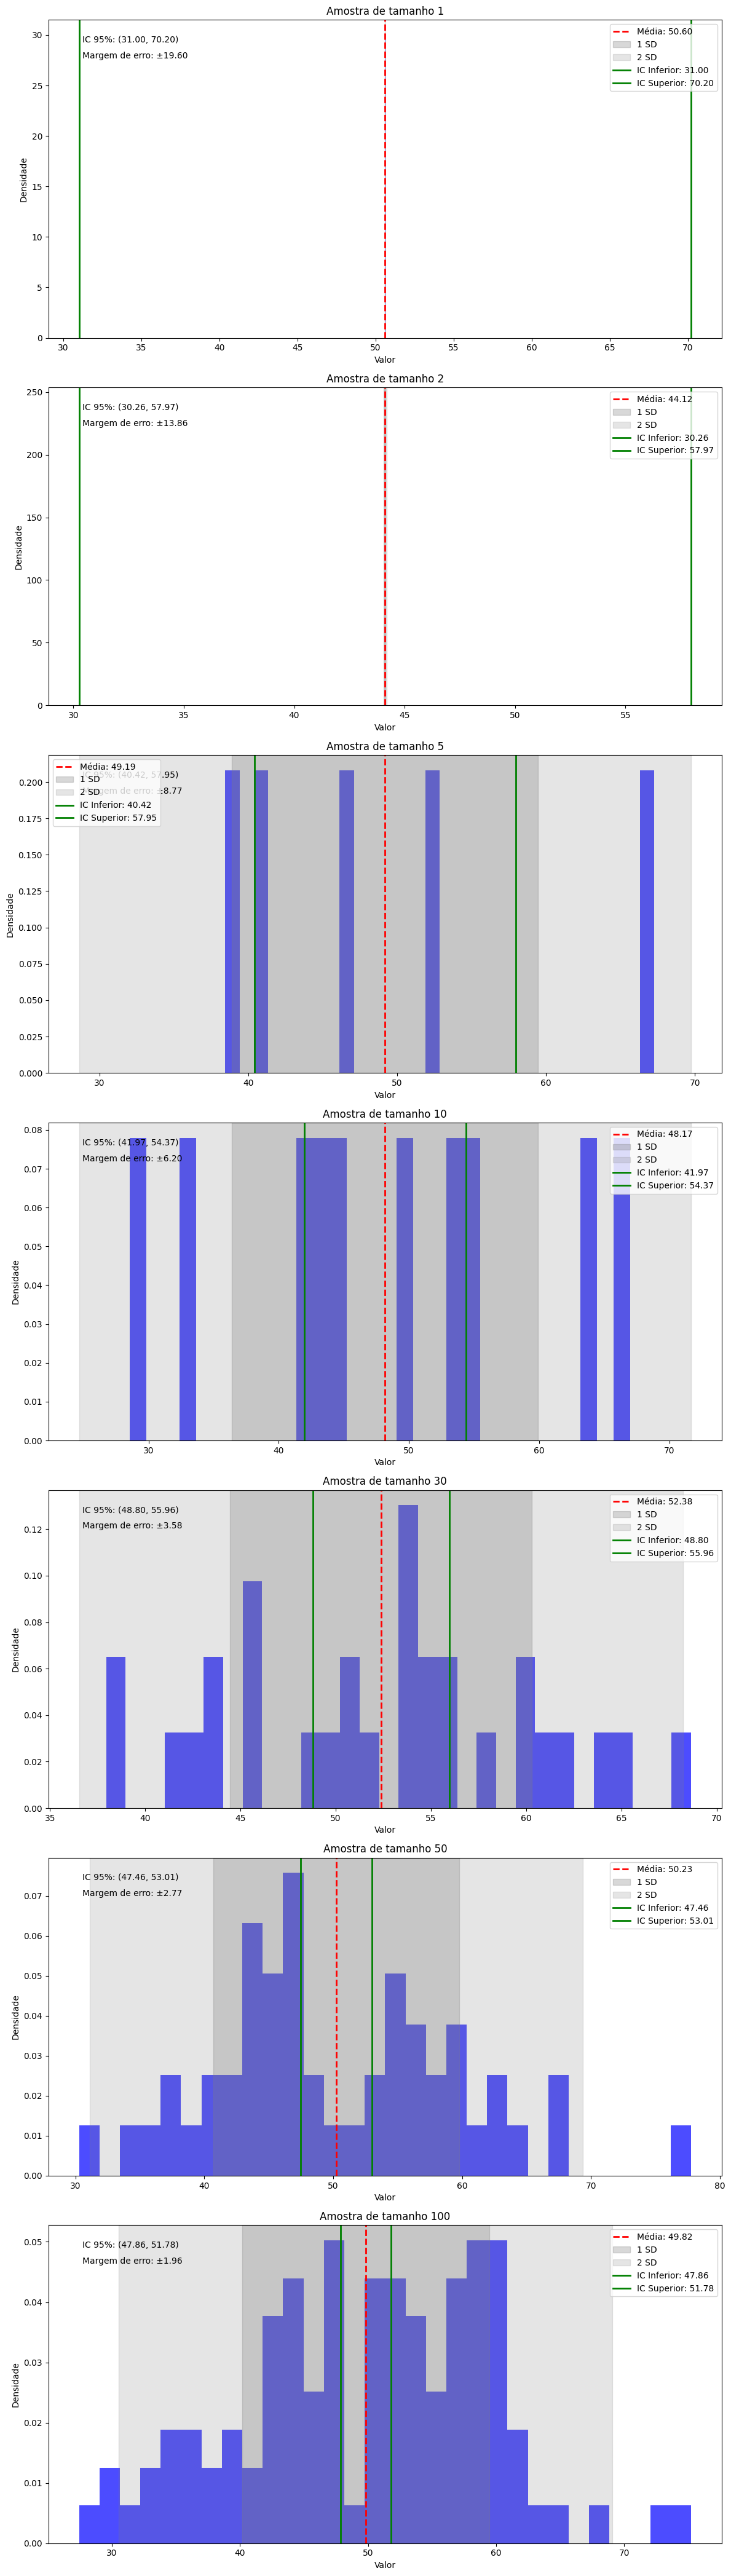

In [4]:
# Configurações do gráfico
fig, axes = plt.subplots(nrows=len(tamanhos), ncols=1, figsize=(12, 6 * len(tamanhos)))

# Plotar um histograma para cada tamanho de amostra
for i, tamanho in enumerate(tamanhos):
    amostra = amostras[i]
    media_amostral = medias[i]
    intervalo = intervalos[i]
    desvio_padrao_amostral = np.std(amostra)
    margem_erro = margens_erros[i]

    # Histograma
    axes[i].hist(amostra, bins=30, color='blue', alpha=0.7, density=True)
    axes[i].axvline(media_amostral, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_amostral:.2f}')
    axes[i].axvspan(media_amostral - desvio_padrao_amostral, media_amostral + desvio_padrao_amostral, alpha=0.3, color='gray', label='1 SD')
    axes[i].axvspan(media_amostral - 2 * desvio_padrao_amostral, media_amostral + 2 * desvio_padrao_amostral, alpha=0.2, color='gray', label='2 SD')
    axes[i].axvline(intervalo[0], color='green', linestyle='solid', linewidth=2, label=f'IC Inferior: {intervalo[0]:.2f}')
    axes[i].axvline(intervalo[1], color='green', linestyle='solid', linewidth=2, label=f'IC Superior: {intervalo[1]:.2f}')

    # Adicionar informações sobre o intervalo de confiança e margem de erro
    axes[i].text(0.05, 0.95, f'IC 95%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})', transform=axes[i].transAxes, verticalalignment='top')
    axes[i].text(0.05, 0.90, f'Margem de erro: ±{margem_erro:.2f}', transform=axes[i].transAxes, verticalalignment='top')

    axes[i].set_title(f'Amostra de tamanho {tamanho}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Densidade')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Visualização nos Gráficos

Nos gráficos fornecidos, observamos as seguintes tendências à medida que o tamanho da amostra aumenta:

1. **Amostra de tamanho 1**:
   - A média amostral pode ser muito diferente da média populacional devido à alta variabilidade.
   - O intervalo de confiança é largo, refletindo a alta incerteza na estimativa da média.

2. **Amostra de tamanho 2 e 5**:
   - As médias amostrais começam a se aproximar da média populacional.
   - A margem de erro e o intervalo de confiança ainda são relativamente grandes, mas diminuem em comparação com a amostra de tamanho 1.

3. **Amostra de tamanho 10**:
   - A média amostral é uma estimativa mais precisa da média populacional.
   - A margem de erro e o intervalo de confiança são menores, indicando uma estimativa mais precisa.

4. **Amostra de tamanho 30, 50 e 100**:
   - As médias amostrais estão muito próximas da média populacional.
   - A margem de erro é pequena, resultando em intervalos de confiança estreitos.
   - A precisão na estimativa da média é alta.

### Conclusão

À medida que o tamanho da amostra aumenta:
- **A média amostral** se torna uma estimativa mais precisa da média populacional.
- **O desvio padrão amostral** se aproxima do desvio padrão populacional.
- **O erro padrão da média** diminui, levando a margens de erro menores.
- **Os intervalos de confiança** se estreitam, refletindo maior precisão na estimativa da média.

Essas tendências demonstram a importância de aumentar o tamanho da amostra para obter estimativas mais precisas e confiáveis em estatísticas inferenciais.

### Importância da Amostra Aleatória

A aleatoriedade na seleção da amostra é fundamental para a inferência estatística porque garante que a amostra não seja enviesada. Sem a aleatoriedade, a estimativa pode ser sistematicamente inclinada para um particular subconjunto da população, resultando em inferências imprecisas ou incorretas sobre a população.

### Por Que Tamanho da Amostra Maior que 30?

O tamanho da amostra maior que 30 é necessário devido ao Teorema Central do Limite (TCL), que afirma que a distribuição das médias amostrais de qualquer distribuição com um número suficiente de observações (geralmente n > 30) se aproxima de uma distribuição normal. Isso permite a aplicação de métodos estatísticos baseados na normalidade, como o cálculo de intervalos de confiança usando o valor crítico z, mesmo que a distribuição original da população não seja normal.

Esse tamanho de amostra assegura que o erro padrão seja suficientemente pequeno para que o intervalo de confiança seja útil e que as propriedades estatísticas, como a média e o desvio padrão da amostra, sejam boas estimativas de seus verdadeiros valores populacionais.

# Exemplo prático

Vamos estimar a altura de uma população com 6 mil habitantes, começamos com uma amostra de 49 habitantes que possui média de altura de 1,70m e um desvio padrão de 25cm

In [5]:
# Amostra
n = 49
mu = 170
sigma = 25

# Erro padrão
erro_padrao = sigma / np.sqrt(n)

# Margem de erro para um intervalo de confiança de 95%
margem_erro = 1.96 * erro_padrao
print(f'Margem de erro: {margem_erro:.4f}')

Margem de erro: 7.0000


Com uma amostra de apenas 49 habitantes temos uma margem de erro de 7 cm, ou seja temos um intervalo de confiança de 1,63m a 1,77m. Esse seria o intervalo onde temos 95% de confiança que a média da população está.

Agora digamos que 7cm de margem de erro é muito grande para o nosso estudo, e precisamos de uma margem de 3cm então devemos aumentar o tamanho da amostra, mas quanto seria necessário aumentar? Qual o menor tamanho da amostra que precisamos para ter uma margem de erro de 3cm?

Para calcular o tamanho mínimo da amostra necessário para alcançar uma margem de erro específica, utilizamos a fórmula que relaciona a margem de erro, o desvio padrão da população, o tamanho da amostra e o valor crítico z da distribuição normal padrão para o nível de confiança desejado. A fórmula para a margem de erro é:

$$
\text{Margem de Erro} = Z_{1-\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

### Problema
Queremos uma margem de erro de 3 cm para o estudo, então vamos reorganizar a fórmula para resolver para $n$ (tamanho da amostra):

$$
3 = 1.96 \cdot \frac{25}{\sqrt{n}}
$$

onde:
- 1.96 é o valor de $Z_{1-\alpha/2}$ para um nível de confiança de 95%
- 25 é o desvio padrão ($\sigma$) assumido para a população

### Passos para Solução

1. **Isolar $\sqrt{n}$**:
   $$
   \sqrt{n} = \frac{1.96 \cdot 25}{3}
   $$

2. **Resolver para $n$**:
   $$
   n = \left(\frac{1.96 \cdot 25}{3}\right)^2
   $$

### Cálculo

Vamos calcular isso:

$$
n = \left(\frac{1.96 \cdot 25}{3}\right)^2 = \left(\frac{49}{3}\right)^2 = \left(16.33\right)^2 \approx 266.79
$$

Arredondando para o próximo número inteiro, pois o tamanho da amostra deve ser um inteiro, já que estamos falando de pessoas:

$$
n \approx 267
$$


In [6]:
# Erro padrão
erro_padrao = sigma / np.sqrt(267)

# Margem de erro para um intervalo de confiança de 95%
margem_erro = 1.96 * erro_padrao
print(f'Margem de erro: {margem_erro:.4f}')

Margem de erro: 2.9988


Voilée! Para obter uma margem de erro de 3 cm, precisamos de uma amostra de pelo menos 267 habitantes.

Então para descobrir a média da população necessária para uma específica margem de erro, temos a fórmula:

$$ n \geq \left(\frac{Z_{\alpha/2} \cdot \sigma}{\text{MOE}}\right)^2 $$



# Diferença entre confiança e probabilidade

O conceito de intervalo de confiança é frequentemente mal interpretado em estatística. A diferença entre "ter confiança" de que um intervalo contém o parâmetro populacional e afirmar que "existe uma probabilidade" de que o parâmetro esteja dentro do intervalo é sutil, mas fundamental. Vamos explorar essa distinção crucial.

### Parâmetro Populacional $ \mu $

O parâmetro $ \mu $ (mu), ou média populacional, é uma característica fixa da população, mas desconhecida. Importante ressaltar que $ \mu $ não possui uma distribuição de probabilidade; ele não é aleatório, apenas desconhecido. Uma vez que $ \mu $ é constante para uma dada população, ele não "cai" dentro de um intervalo de confiança com uma certa probabilidade – ele simplesmente está ou não está dentro de um intervalo de confiança específico calculado a partir de uma amostra.

### Distribuição da Média Amostral $ \bar{x} $

Diferentemente de $ \mu $, a média amostral $ \bar{x} $ (x bar) tem uma distribuição de probabilidade, conhecida como distribuição amostral das médias. O valor de $ \bar{x} $ varia dependendo da amostra específica tirada da população. Essa variação é o que permite a construção de intervalos de confiança em torno de $ \bar{x} $ para estimar $ \mu $.

### Intervalo de Confiança

O intervalo de confiança é construído em torno da média amostral $ \bar{x} $ e muda conforme $ \bar{x} $ muda com diferentes amostras. Quando dizemos que estamos "95% confiantes" em um intervalo de confiança, estamos nos referindo à metodologia de construção desses intervalos:

- Se repetirmos o experimento de amostragem muitas vezes, e para cada amostra calcularmos um intervalo de confiança em torno de $ \bar{x} $, esperamos que 95% desses intervalos contenham $ \mu $.
- Essa "confiança" de 95% está relacionada à taxa de sucesso na construção desses intervalos ao longo de muitas amostras, e não à probabilidade de que um intervalo específico contém $ \mu $.

### Por Que a Distinção é Importante?

Afirmar que "existe uma probabilidade de 95% de que $ \mu $ esteja dentro do intervalo de confiança" é incorreto porque implica que $ \mu $ é uma variável aleatória que muda de localização, o que não é verdade. $ \mu $ é um valor fixo e desconhecido, e não muda. O intervalo de confiança é que varia dependendo da amostra obtida. Portanto, a correta interpretação de um intervalo de confiança de 95% é sobre o método estatístico ser capaz de capturar o verdadeiro $ \mu $ em 95% dos casos se o processo de amostragem fosse repetido infinitamente sob as mesmas condições.

# Desvio Padrão Desconhecido

Até agora assumimos que conheciamos o desvio padrão da população total. Porém isso nem sempre é o caso, mas não tem problema. Quando não sabemos, tudo que precisamos fazer é uma pequena alteração nos cálculos introduzindo algo chamado de **t-distribution**.

### Usando a Distribuição t-Student

Quando o desvio padrão da população ($\sigma$) não é conhecido, utilizamos o desvio padrão da amostra ($s$) como uma estimativa. Isso altera a distribuição assumida para o cálculo do intervalo de confiança de uma distribuição normal para uma distribuição t de Student. A distribuição t é particularmente útil porque leva em conta o tamanho da amostra e o fato de que estamos usando uma estimativa do desvio padrão ao invés do valor real.

#### Fórmula do Intervalo de Confiança com a Distribuição t

O intervalo de confiança para a média ($\mu$), quando $\sigma$ não é conhecido, é dado por:

$$
\text{IC} = \bar{x} \pm t_{\alpha/2, n-1} \left(\frac{s}{\sqrt{n}}\right)
$$

onde:
- $\bar{x}$ é a média amostral.
- $t_{\alpha/2, n-1}$ é o valor crítico da distribuição t de Student para $1-\alpha/2$ (ex., 95% de confiança) e $n-1$ graus de liberdade.
- $s$ é o desvio padrão da amostra.
- $n$ é o tamanho da amostra.
- $\frac{s}{\sqrt{n}}$ é o erro padrão da média usando o desvio padrão da amostra.

#### Características da Distribuição t de Student

- **Caudas mais "gordas"**: A distribuição t tem caudas mais pesadas que a distribuição normal. Isso reflete maior incerteza e compensa o fato de que o desvio padrão da população é desconhecido.
- **Dependência do tamanho da amostra**: À medida que o tamanho da amostra aumenta, a distribuição t de Student se aproxima da distribuição normal. Isso ocorre porque, com amostras grandes, o desvio padrão da amostra ($s$) torna-se um estimador mais preciso de $\sigma$.


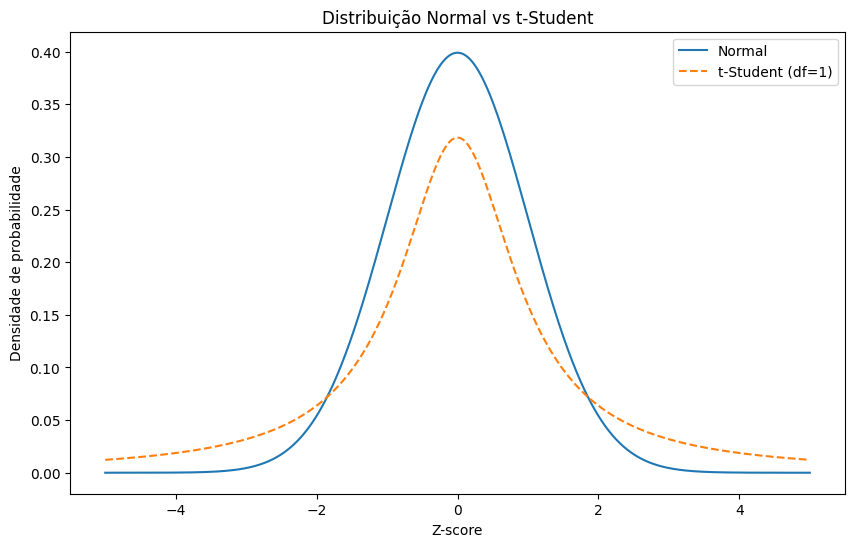

In [7]:
# Configuração dos valores de x
x = np.linspace(-5, 5, 1000)

# Cálculo da densidade de probabilidade para a distribuição normal
y_norm = norm.pdf(x, 0, 1)  # Média 0, desvio padrão 1

# Cálculo da densidade de probabilidade para a distribuição t-Student
y_t = t.pdf(x, 1)  # 1 grau de liberdade

# Criação da figura e do gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y_norm, label='Normal')
plt.plot(x, y_t, label='t-Student (df=1)', linestyle='--')

# Adicionando título e legendas
plt.title('Distribuição Normal vs t-Student')
plt.xlabel('Z-score')
plt.ylabel('Densidade de probabilidade')

# Adicionando a legenda
plt.legend()

# Exibição do gráfico
plt.show()

### Ajustando para Variabilidade com a Distribuição t

1. **Substituindo $\sigma$ por $s$**:
   - Quando $\sigma$ é desconhecido, usamos o desvio padrão da amostra $s$ como uma estimativa. Isso muda a base de nossa estimativa de erro de um parâmetro conhecido da população para um estimado a partir da amostra.

2. **Mudança de z-score para t-score**:
   - Normalmente, com um $\sigma$ conhecido, o z-score (da distribuição normal padrão) é usado para determinar os valores críticos para a construção de intervalos de confiança.
   - Ao usar $s$ em vez de $\sigma$, a distribuição da média amostral não segue mais estritamente a distribuição normal, especialmente com tamanhos de amostra menores. Isso torna necessária a utilização da distribuição t, que ajusta para a incerteza adicional devido à estimativa de $\sigma$ a partir da amostra.

### Fórmulas para Intervalos de Confiança

- **Com $\sigma$ Conhecido**:
 $$
  \text{IC} = \bar{x} \pm z_{\alpha/2} \left(\frac{\sigma}{\sqrt{n}}\right)
  $$
  Aqui, $z_{\alpha/2}$ é o valor crítico da distribuição normal padrão para o nível de confiança desejado.

- **Com $\sigma$ Desconhecido**:
 $$
  \text{IC} = \bar{x} \pm t_{\alpha/2, n-1} \left(\frac{s}{\sqrt{n}}\right)
  $$
  Aqui, $t_{\alpha/2, n-1}$ é o valor crítico da distribuição t para o nível de confiança desejado e $n-1$ graus de liberdade.

### Graus de Liberdade e a Distribuição t

- **Impacto dos Graus de Liberdade**:
  - Os graus de liberdade (df) em uma distribuição t, definidos como $n-1$ onde $n$ é o tamanho da amostra, influenciam a forma da distribuição.
  - Menores graus de liberdade resultam em uma distribuição com caudas mais pesadas, o que fornece um intervalo de confiança mais amplo, refletindo maior incerteza.
  - À medida que os graus de liberdade aumentam (à medida que o tamanho da amostra aumenta), a distribuição t se aproxima da forma da distribuição normal. Isso ocorre porque um tamanho de amostra maior fornece uma estimativa melhor do desvio padrão da população.

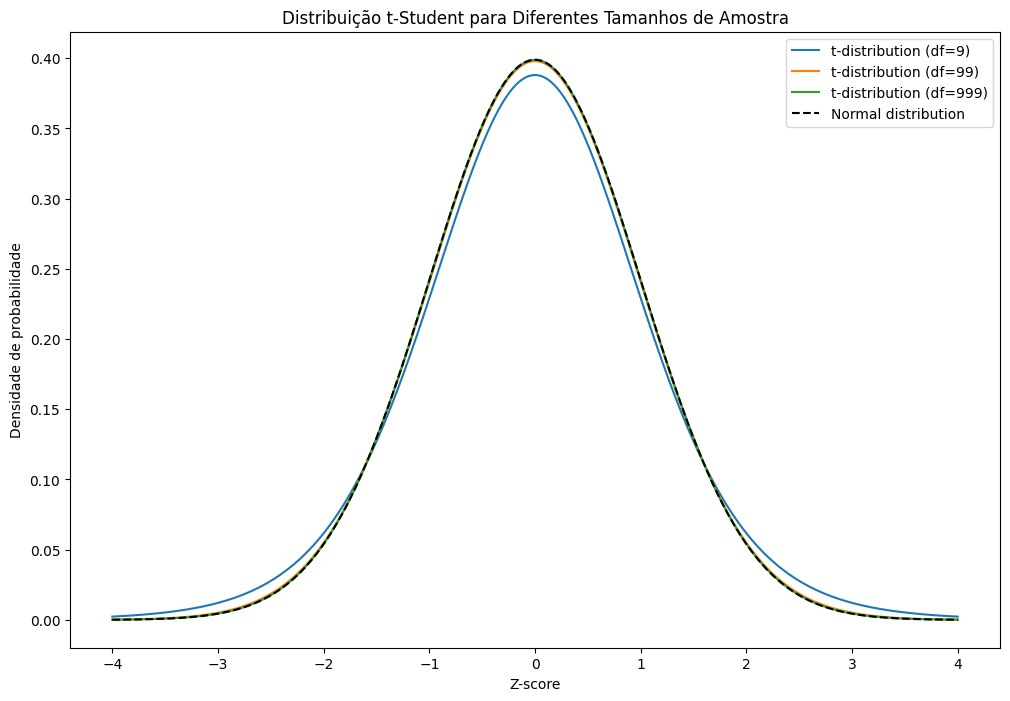

In [8]:
# Definição dos tamanhos de amostra e criação dos eixos x para o plot
tamanhos_amostra = [10, 100, 1000]
x = np.linspace(-4, 4, 1000)

# Configuração da figura
plt.figure(figsize=(12, 8))

# Loop para plotar as distribuições t com diferentes graus de liberdade
for n in tamanhos_amostra:
    df = n - 1
    y_t = t.pdf(x, df)
    plt.plot(x, y_t, label=f't-distribution (df={df})')

# Plot da distribuição normal para comparação
y_norm = norm.pdf(x, 0, 1)
plt.plot(x, y_norm, 'k--', label='Normal distribution')

# Adição de títulos e legendas
plt.title('Distribuição t-Student para Diferentes Tamanhos de Amostra')
plt.xlabel('Z-score')
plt.ylabel('Densidade de probabilidade')
plt.legend()

# Exibição do gráfico
plt.show()

# Intervalos de confiança para proporção

Como trabalhamos com intervalos de confiança para proporções? Considere o seguinte problema: Você deseja descobrir a proporção de adultos que possuem um carro, digamos que você possua uma amostra com 30 pessoas e você descobre que 24 dessas pessoas possuem um carro.

In [10]:
# Dados da amostra
n = 30
x = 24
p_hat = x / n  # Proporção da amostra
print(f'Proporção estimada: {p_hat:.2f}')

Proporção estimada: 0.80


Calculamos a proporção de pessoas que possuem um carro, sendo 80%. Essa pode não ser a proporção da população total mas é provável que esteja próximo dela. E como calculamos um intervalo de confiança de 95% para essa proporção amostral?

Semelhante ao intervalo de confiança para a média, o intervalo de confiança para a proporção é dado pela fórmula: 

$$ \hat{p} \pm \text{margem de erro} $$

onde a margem de erro é dada por:

$$ \text{margem de erro} = z_{1-\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $$

#### Componentes da Fórmula:

- $ \hat{p} $: É a proporção da amostra, calculada como a fração de sucessos sobre o total da amostra.
- $ z_{1-\alpha/2} $: É o valor crítico da distribuição normal padrão que corresponde à confiança desejada (95%, por exemplo, resulta em aproximadamente 1.96).
- $ \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} $: É o erro padrão da proporção, que quantifica a variabilidade esperada na estimativa da proporção devido ao tamanho finito da amostra.
- $ n $: É o tamanho da amostra.

#### Interpretação:

- **Intervalo de Confiança**: Oferece um intervalo de valores plausíveis para a proporção da população com base nos dados da amostra.
- **Margem de Erro**: Indica a precisão da estimativa $ \hat{p} $ e varia inversamente com a raiz quadrada do tamanho da amostra; quanto maior o $ n $, menor a margem de erro.




In [11]:
# Erro padrão da proporção
SE = np.sqrt(p_hat * (1 - p_hat) / n)

# Valor crítico para 95% de confiança
z = norm.ppf(0.975)  # 1.96 aproximadamente

# Margem de erro
ME = z * SE

# Intervalo de confiança
IC_inferior = p_hat - ME
IC_superior = p_hat + ME

print(f'Margem de erro: {ME:.4f}')
print(f'Intervalo de confiança de 95%: ({IC_inferior:.2f}, {IC_superior:.2f})')


Margem de erro: 0.1431
Intervalo de confiança de 95%: (0.66, 0.94)


O intervalo de confiança está entre 0.66 < p < 0.94, ou seja, estamos 95% confiantes de que a proporção da população total de adultos que possuem um carro está entre 66% e 94%.